# **Lab 2: Logistic Regression and Fully-Connected Neural Network**

The lab report will be due by **March 7th, 2023**. 

**Requirement: Please submit the ipynb file of your lab via the link in Brightspace.**

##**Problem 1**
In this problem, we will explore applying logistic regression to realize binary-class classification on the data in Data_Lab2_1.csv.

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training error, and (3) the obtained testing error. 

In [ ]:
#update mlxtend 
!pip install mlxtend --upgrade

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# mounted google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# imported libraries
import tensorflow as tf
from tensorflow.keras import datasets, layers, models, optimizers
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split 
from mlxtend.plotting import plot_decision_regions

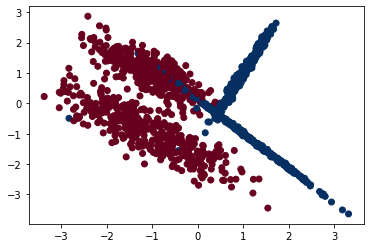

In [ ]:
# get data and show plot
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labs/Lab2/Data_Lab2_1.csv')
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y_data'].values
plt.scatter(x_data[:,0], x_data[:,1], c=y_data, cmap="RdBu")
plt.show()

In [ ]:
# make training and test data
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Designed the logistic regression model
model1 = models.Sequential()
model1.add(layers.Normalization(input_shape = [2,], axis = None))
model1.add(layers.Dense(1, activation = 'sigmoid'))
model1.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_4 (Normalizat  (None, 2)                3         
 ion)                                                            
                                                                 
 dense_6 (Dense)             (None, 1)                 3         
                                                                 
Total params: 6
Trainable params: 3
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Compiled and trained model
adam = optimizers.Adam(learning_rate=0.3)
model1.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
33/33 [==============================] - 2s 16ms/step - loss: 0.4689 - accuracy: 0.8400 - val_loss: 0.4138 - val_accuracy: 0.8556
Epoch 2/300
33/33 [==============================] - 0s 9ms/step - loss: 0.4567 - accuracy: 0.8486 - val_loss: 0.4021 - val_accuracy: 0.8689
Epoch 3/300
33/33 [==============================] - 0s 11ms/step - loss: 0.4450 - accuracy: 0.8552 - val_loss: 0.3909 - val_accuracy: 0.8756
Epoch 4/300
33/33 [==============================] - 0s 5ms/step - loss: 0.4341 - accuracy: 0.8571 - val_loss: 0.3802 - val_accuracy: 0.8778
Epoch 5/300
33/33 [==============================] - 0s 6ms/step - loss: 0.4235 - accuracy: 0.8590 - val_loss: 0.3703 - val_accuracy: 0.8822
Epoch 6/300
33/33 [==============================] - 0s 5ms/step - loss: 0.4137 - accuracy: 0.8619 - val_loss: 0.3608 - val_accuracy: 0.8844
Epoch 7/300
33/33 [==============================] - 0s 5ms/step - loss: 0.4043 - accuracy: 0.8629 - val_loss: 0.3518 - val_accuracy: 0.8867
Epoch 8/300

3888/3888 [==============================] - 7s 2ms/step


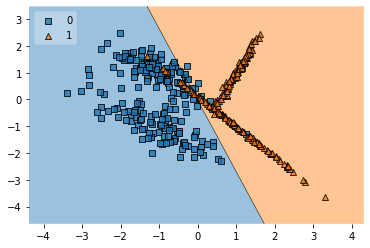

15/15 - 0s - loss: 0.1357 - accuracy: 0.9400 - 50ms/epoch - 3ms/step
0.9399999976158142


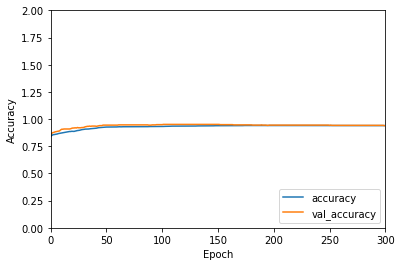

In [ ]:
# Evaluated the Model and plot results
plot_decision_regions(x_test, y_test, clf=model1, legend=2)
plt.show()
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

##**Problem 2**
In this problem, we will explore applying fully-connected neural network to realize binary-class classification on the data in Data_Lab2_1.csv.

Requirments: 
*   You need to include the following four components in your lab report: (1) the codes, (2) the structure of the fully-connected neural network that you design, including the number of layers and the number of computing nodes in each layer, (3) the obtained training error, and (4) the obtained testing error. 

(Comment: There is no unique solution for the design of the fully-connected neural network.)

In [ ]:
# Obtained the data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labs/Lab2/Data_Lab2_1.csv')
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y_data'].values
#train
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3) 

In [ ]:
# Designed the fully-connected neural network with 
# one input layer with two nodes, one hidden layer with two nodes, and one output layer with one node
model2 = models.Sequential()
model2.add(layers.Normalization(input_shape = [2,], axis = None))
model2.add(layers.Dense(2, activation='sigmoid'))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_5 (Normalizat  (None, 2)                3         
 ion)                                                            
                                                                 
 dense_7 (Dense)             (None, 2)                 6         
                                                                 
 dense_8 (Dense)             (None, 1)                 3         
                                                                 
Total params: 12
Trainable params: 9
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Compiled and trained the fully-connected NN model
adam = optimizers.Adam(learning_rate=0.3)
model2.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
33/33 [==============================] - 2s 15ms/step - loss: 0.7214 - accuracy: 0.4990 - val_loss: 0.7136 - val_accuracy: 0.5022
Epoch 2/300
33/33 [==============================] - 0s 7ms/step - loss: 0.7113 - accuracy: 0.4990 - val_loss: 0.7043 - val_accuracy: 0.5022
Epoch 3/300
33/33 [==============================] - 0s 8ms/step - loss: 0.7022 - accuracy: 0.4990 - val_loss: 0.6962 - val_accuracy: 0.5022
Epoch 4/300
33/33 [==============================] - 0s 8ms/step - loss: 0.6941 - accuracy: 0.5162 - val_loss: 0.6882 - val_accuracy: 0.5511
Epoch 5/300
33/33 [==============================] - 0s 7ms/step - loss: 0.6862 - accuracy: 0.6057 - val_loss: 0.6811 - val_accuracy: 0.6711
Epoch 6/300
33/33 [==============================] - 0s 7ms/step - loss: 0.6789 - accuracy: 0.7086 - val_loss: 0.6743 - val_accuracy: 0.7289
Epoch 7/300
33/33 [==============================] - 0s 7ms/step - loss: 0.6721 - accuracy: 0.7552 - val_loss: 0.6675 - val_accuracy: 0.8978
Epoch 8/300


3888/3888 [==============================] - 7s 2ms/step


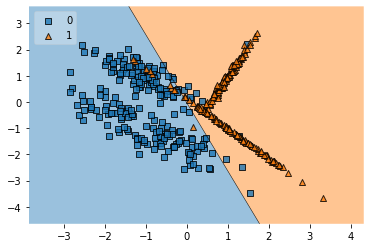

15/15 - 0s - loss: 0.1583 - accuracy: 0.9467 - 52ms/epoch - 3ms/step
0.9466666579246521


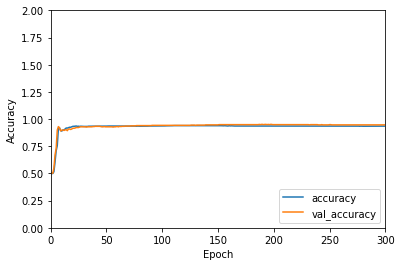

In [ ]:
# Evaluated the fully connected neural network Model
plot_decision_regions(x_test, y_test, clf=model2, legend=2)
plt.show()
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

##**Problem 3**
In this problem, we will explore applying logistic regression to realize binary-class classification on the data in Data_Lab2_2.csv.

Requirments: 
*   You need to include the following three components in your lab report: (1) the codes, (2) the obtained training error, and (3) the obtained testing error. 

(Comment: It is fine if you cannot obtain high accuracy.)

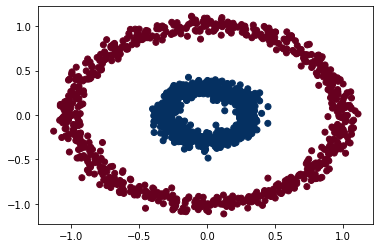

In [ ]:
# Obtained the data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labs/Lab2/Data_Lab2_2.csv')
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y_data'].values
plt.scatter(x_data[:,0], x_data[:,1], c=y_data, cmap="RdBu")
plt.show()
#train
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3)

In [ ]:
# Designed the logistic regression model
model1 = models.Sequential()
model1.add(layers.Normalization(input_shape = [2,], axis = None))
model1.add(layers.Dense(1, activation = 'sigmoid'))
model1.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_6 (Normalizat  (None, 2)                3         
 ion)                                                            
                                                                 
 dense_9 (Dense)             (None, 1)                 3         
                                                                 
Total params: 6
Trainable params: 3
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Compiled and trained the model
adam = optimizers.Adam(learning_rate=0.3)
model1.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
history1 = model1.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
33/33 [==============================] - 2s 16ms/step - loss: 0.6953 - accuracy: 0.5095 - val_loss: 0.6951 - val_accuracy: 0.4911
Epoch 2/300
33/33 [==============================] - 0s 8ms/step - loss: 0.6951 - accuracy: 0.4971 - val_loss: 0.6951 - val_accuracy: 0.4867
Epoch 3/300
33/33 [==============================] - 0s 10ms/step - loss: 0.6948 - accuracy: 0.4867 - val_loss: 0.6951 - val_accuracy: 0.4867
Epoch 4/300
33/33 [==============================] - 0s 7ms/step - loss: 0.6947 - accuracy: 0.4829 - val_loss: 0.6949 - val_accuracy: 0.4800
Epoch 5/300
33/33 [==============================] - 0s 5ms/step - loss: 0.6945 - accuracy: 0.4781 - val_loss: 0.6949 - val_accuracy: 0.4778
Epoch 6/300
33/33 [==============================] - 0s 5ms/step - loss: 0.6943 - accuracy: 0.4629 - val_loss: 0.6950 - val_accuracy: 0.4644
Epoch 7/300
33/33 [==============================] - 0s 5ms/step - loss: 0.6942 - accuracy: 0.4514 - val_loss: 0.6950 - val_accuracy: 0.4533
Epoch 8/300

3888/3888 [==============================] - 6s 2ms/step


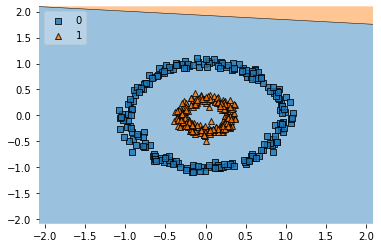

15/15 - 0s - loss: 0.6945 - accuracy: 0.4756 - 55ms/epoch - 4ms/step
0.47555556893348694


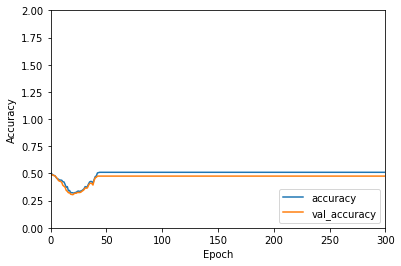

In [ ]:
# Evaluated the Model
plot_decision_regions(x_test, y_test, clf=model1, legend=2)
plt.show()
plt.plot(history1.history['accuracy'], label='accuracy')
plt.plot(history1.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss, test_acc = model1.evaluate(x_test,  y_test, verbose=2)
print(test_acc)

##**Problem 4**
In this problem, we will explore applying fully-connected neural network to realize binary-class classification on the data in Data_Lab2_2.csv.

Requirments: 
*   You need to include the following four components in your lab report: (1) the codes, (2) the structure of the fully-connected neural network that you design, including the number of layers and the number of computing nodes in each layer, (3) the obtained training error, and (4) the obtained testing error. 

(Comment: There is no unique solution for the design of the fully-connected neural network.)

In [ ]:
# Obtained the data
data=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Labs/Lab2/Data_Lab2_2.csv') # you may need to change the path
x_0 = data['x_data_0'].values
x_1 = data['x_data_1'].values
x_data = np.stack((x_0, x_1), axis=1)
y_data = data['y_data'].values
#train
x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size=0.3) 

In [ ]:
# Designed a fully-connected neural network with 
# one input layer with two nodes, one hidden layer with two nodes, and one output layer with one node
model2 = models.Sequential()
model2.add(layers.Normalization(input_shape = [2,], axis = None))
model2.add(layers.Dense(2, activation='sigmoid'))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 normalization_7 (Normalizat  (None, 2)                3         
 ion)                                                            
                                                                 
 dense_10 (Dense)            (None, 2)                 6         
                                                                 
 dense_11 (Dense)            (None, 1)                 3         
                                                                 
Total params: 12
Trainable params: 9
Non-trainable params: 3
_________________________________________________________________


In [ ]:
# Compiled and trained the fully-connected NN model
adam = optimizers.Adam(learning_rate=0.3)
model2.compile(optimizer='adam', loss=tf.keras.losses.binary_crossentropy, metrics=['accuracy'])
history2 = model2.fit(x_train, y_train, epochs=300, validation_data=(x_test, y_test))

Epoch 1/300
33/33 [==============================] - 1s 10ms/step - loss: 0.7573 - accuracy: 0.5048 - val_loss: 0.7607 - val_accuracy: 0.4889
Epoch 2/300
33/33 [==============================] - 0s 5ms/step - loss: 0.7462 - accuracy: 0.5048 - val_loss: 0.7496 - val_accuracy: 0.4889
Epoch 3/300
33/33 [==============================] - 0s 6ms/step - loss: 0.7367 - accuracy: 0.5048 - val_loss: 0.7400 - val_accuracy: 0.4889
Epoch 4/300
33/33 [==============================] - 0s 5ms/step - loss: 0.7287 - accuracy: 0.5048 - val_loss: 0.7321 - val_accuracy: 0.4889
Epoch 5/300
33/33 [==============================] - 0s 6ms/step - loss: 0.7221 - accuracy: 0.5048 - val_loss: 0.7256 - val_accuracy: 0.4889
Epoch 6/300
33/33 [==============================] - 0s 7ms/step - loss: 0.7165 - accuracy: 0.5048 - val_loss: 0.7200 - val_accuracy: 0.4889
Epoch 7/300
33/33 [==============================] - 0s 6ms/step - loss: 0.7119 - accuracy: 0.5048 - val_loss: 0.7150 - val_accuracy: 0.4889
Epoch 8/300


3888/3888 [==============================] - 8s 2ms/step


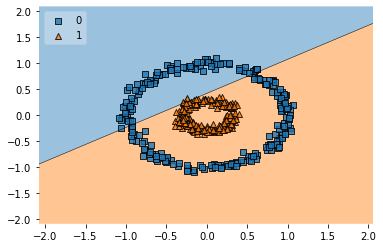

15/15 - 0s - loss: 0.6295 - accuracy: 0.6733 - 49ms/epoch - 3ms/step
0.6733333468437195


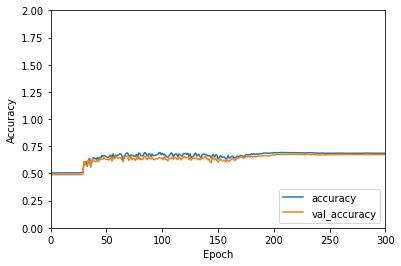

In [ ]:
# Evaluated the fully connected neural network Model
plot_decision_regions(x_test, y_test, clf=model2, legend=2)
plt.show()
plt.plot(history2.history['accuracy'], label='accuracy')
plt.plot(history2.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.xlim([0, 300])
plt.ylim([0, 2])
plt.legend(loc='lower right')

test_loss, test_acc = model2.evaluate(x_test,  y_test, verbose=2)
print(test_acc)